# Hackathon - Building a Movie Recommendation System
## # MD Tahseen Equbal 

## Import Library

In [1]:
import pandas as pd


C:\Users\91771\anaconda3\envs\tf\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load Data Set 

In [2]:
df_T=pd.read_csv(r"C:\Users\91771\Innomatics\Machine Learning\Machine Learning\Hackathon\tags.csv")
df_T

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [3]:
df_L=pd.read_csv(r"C:\Users\91771\Innomatics\Machine Learning\Machine Learning\Hackathon\links.csv")
df_L

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
df_M=pd.read_csv(r"C:\Users\91771\Innomatics\Machine Learning\Machine Learning\Hackathon\movies.csv")
df_M

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
df_R=pd.read_csv(r"C:\Users\91771\Innomatics\Machine Learning\Machine Learning\Hackathon\ratings.csv")
df_R

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## 2 What is the shape of "movies.csv"?
- (3683, 4)
- (9742, 3)
- (100836, 4)
- None of the above

In [6]:
df_M.shape

(9742, 3)

## 3 What is the shape of "ratings.csv"?
- (3683, 4)
- (9742, 3)
- (100836, 4)
- None of the above

In [7]:
df_R.shape

(100836, 4)

## 4 How many unique "userId" are available in "ratings.csv"?
*

In [8]:
unique_value = df_R["userId"].nunique()
unique_value

610

## 5 Which movie has recieved maximum number of user ratings?
- Matrix
- Pulp Fiction
- Forrest Gump
- Shawshank Redemption


In [9]:
# Group by movieId and count the number of ratings for each movie
rating_counts = df_R.groupby('movieId').size().reset_index(name='rating_count')
rating_counts

,movieId,rating_count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [10]:
# Find the movie(s) with the maximum number of ratings
max_rating_count = rating_counts['rating_count'].max()
movies_with_max_user_ratings = rating_counts[rating_counts['rating_count'] == max_rating_count]

In [11]:
movies_with_max_user_ratings

,movieId,rating_count
314,356,329


In [12]:
# Find the title of the movie with movieId 356
movie_title = df_M[df_M['movieId'] == 356]['title'].values[0]
movie_title

'Forrest Gump (1994)'

##  6.Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
- alternate universe
- karate
- philosophy
- post apocalyptic

In [13]:
matrix_id = df_M[df_M['title']=='Matrix, The (1999)']['movieId']
matrix_tag  = df_T[df_T['movieId'] == matrix_id.values[0]]
matrix_tag

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


## 7 What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
- 

In [14]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
movie_id = df_M[df_M['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]
movie_id


589

In [15]:
# Calculate the average rating for the movie
average_rating = df_R[df_R['movieId'] == movie_id]['rating'].mean()
average_rating

3.970982142857143

## 8 How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
- Normal Distribution
- Left Skewed Distribution
- Right Skewed Distribution
- Uniform Distribution

In [16]:
import matplotlib.pyplot as plt

In [17]:
# Find the movieId for "Fight Club (1999)"
fight_club_id = df_M[df_M['title'] == 'Fight Club (1999)']['movieId'].values

# Filter ratings for "Fight Club (1999)" using its movieId
fight_club_ratings = df_R[df_R['movieId'] == 2959]['rating']


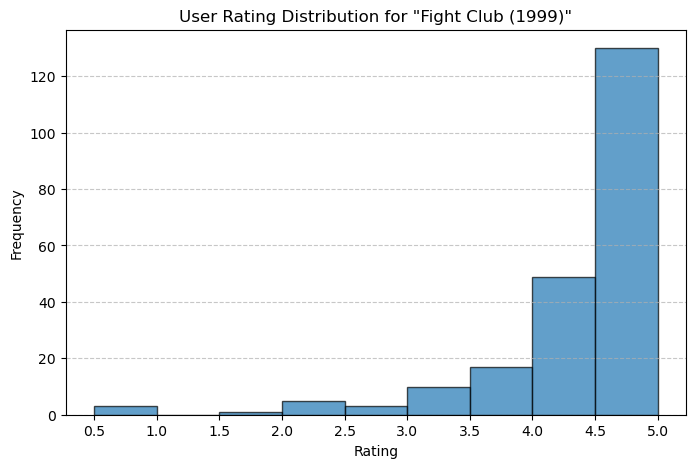

In [18]:

# Plot the distribution of user ratings for "Fight Club (1999)"
plt.figure(figsize=(8, 5))
plt.hist(fight_club_ratings, bins=9, edgecolor='black', alpha=0.7)
plt.title('User Rating Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Important Notes Question 1
-Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

-Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

-Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings. 


## 1 Which movie is the most popular based on  average user ratings?
- Godfather, The (1972)
- Shawshank Redemption, The (1994)
- Jumanji (1995)
- Wolf of Wall Street, The (2013)


In [19]:
# Step 1: Group the user ratings by movieId and apply count and mean aggregation
ratings_grouped = df_R.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

In [20]:
# Step 2: Apply inner join on the movies DataFrame and the grouped DataFrame
merged_df = pd.merge(df_M, ratings_grouped, on='movieId', how='inner')

In [21]:
# Step 3: Filter only those movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]


In [22]:
# List of movie titles to compare
movie_titles = [
    "Godfather, The (1972)", 
    "Shawshank Redemption, The (1994)", 
    "Jumanji (1995)", 
    "Wolf of Wall Street, The (2013)"
]


In [23]:
# Filter the movies that match the given titles
filtered_specific_movies = filtered_movies[filtered_movies['title'].isin(movie_titles)]

# Find the movie with the highest average rating
most_popular_movie = filtered_specific_movies.loc[filtered_specific_movies['rating_mean'].idxmax()]

most_popular_movie_title = most_popular_movie['title']
highest_average_rating = most_popular_movie['rating_mean']

print(f"The most popular movie based on average user ratings is '{most_popular_movie_title}' with an average rating of {highest_average_rating:.2f}.")

The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43.


## 2.Select all the correct options which comes under top 5 popular movies based on number of user ratings.

Answer this question only after applying the above mentioned "Mandatory Operration".

- Pulp Fiction (1994)
- Bad Boys (1995)
- Silence of the Lambs, The (1991)
- Matrix, The (1999)'''

In [24]:
# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = df_R.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Step 2: Inner join on df_M and the grouped dataframe
merged_df = pd.merge(df_M, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

In [25]:
# Top 5 popular movies based on the number of user ratings
top_5_popular_movies = filtered_df.sort_values('rating_count', ascending=False).head(5)

print("Top 5 Popular Movies:")
print(top_5_popular_movies[['title', 'rating_count']])

Top 5 Popular Movies:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


## 3 Which Sci-Fi movie is "third most popular" based on the number of user ratings?
 this question only after applying the above mentioned "Mandatory Operration".
- Deadpool (2016)
- Terminator 2: Judgment Day (1991)
- X-Men: The Last Stand (2006)
- Jurassic Park (1993)

In [26]:
# Filter Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False)]

# Third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi_movie = sci_fi_movies.sort_values('rating_count', ascending=False).iloc[2]

print("Third Most Popular Sci-Fi Movie:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])

Third Most Popular Sci-Fi Movie:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


# Important Notes 2 
- 🟢 IMPORTANT NOTE 2 🟢
- You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

- Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

- If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

## 1 Mention the movieId of the movie which has the highest IMDB rating.


## 2 Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [28]:
df_L

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [34]:
mergedmov_rat= pd.merge( df_M,df_R, on = 'movieId')
mergedmov_rat

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [35]:
filtered_movies = merged_df[merged_df['rating_count'] > 50]
filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [37]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# Assuming 'filtered_movies' DataFrame contains movies with more than 50 user ratings
# Assuming 'links_df' DataFrame contains movieId, imdbId, tmdbId

movies_with_imdb_ids = pd.merge(filtered_movies, df_L, on='movieId', how='inner')

all_reviews = []

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class
    
    reviews = [container.text.strip() for container in review_containers]
    return reviews

# Iterate through movies with IMDB IDs and scrape reviews
for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    all_reviews.extend(movie_reviews)

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame({'IMDB_Reviews': all_reviews})